In [1]:
import os
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
import py3Dmol
from IPython.display import display, Image
import pandas as pd

In [2]:
data = pd.read_csv("../data/raw/HIV.csv")
data.head(5)

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [3]:
data.describe()

,HIV_active
count,41127.000000
mean,0.035086
std,0.184001
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


Hence, we can see that there are 41,127 samples of SMILES strings in the dataset. 

In [4]:
counts = data['HIV_active'].value_counts()
print(counts)

HIV_active
0    39684
1     1443
Name: count, dtype: int64


So we are dealing with 39,684 inactive compounds and 1443 active compounds

Let's see the type of activity these compounds have

In [5]:
activity = data['activity'].value_counts()
print(activity)

activity
CI    39684
CM     1039
CA      404
Name: count, dtype: int64


There are three types of groups: *Confirmed Inactive*, *Confirmed Moderately Active* and *Confirmed Active*. 
We can see that CM and CA are already considered as active in HIV_active

Let us have a look at the molecules we are dealing with

[00:32:53] Explicit valence for atom # 3 Al, 6, is greater than permitted
[00:32:53] Explicit valence for atom # 5 B, 5, is greater than permitted
[00:32:55] Explicit valence for atom # 16 Al, 9, is greater than permitted
[00:32:55] Explicit valence for atom # 4 Al, 9, is greater than permitted
[00:32:57] Explicit valence for atom # 12 Al, 7, is greater than permitted
[00:32:57] Explicit valence for atom # 13 Al, 7, is greater than permitted
[00:32:57] WARNING: not removing hydrogen atom without neighbors
[00:32:57] WARNING: not removing hydrogen atom without neighbors
[00:32:58] Explicit valence for atom # 6 Ge, 5, is greater than permitted


'Click on the photo to zoom it'

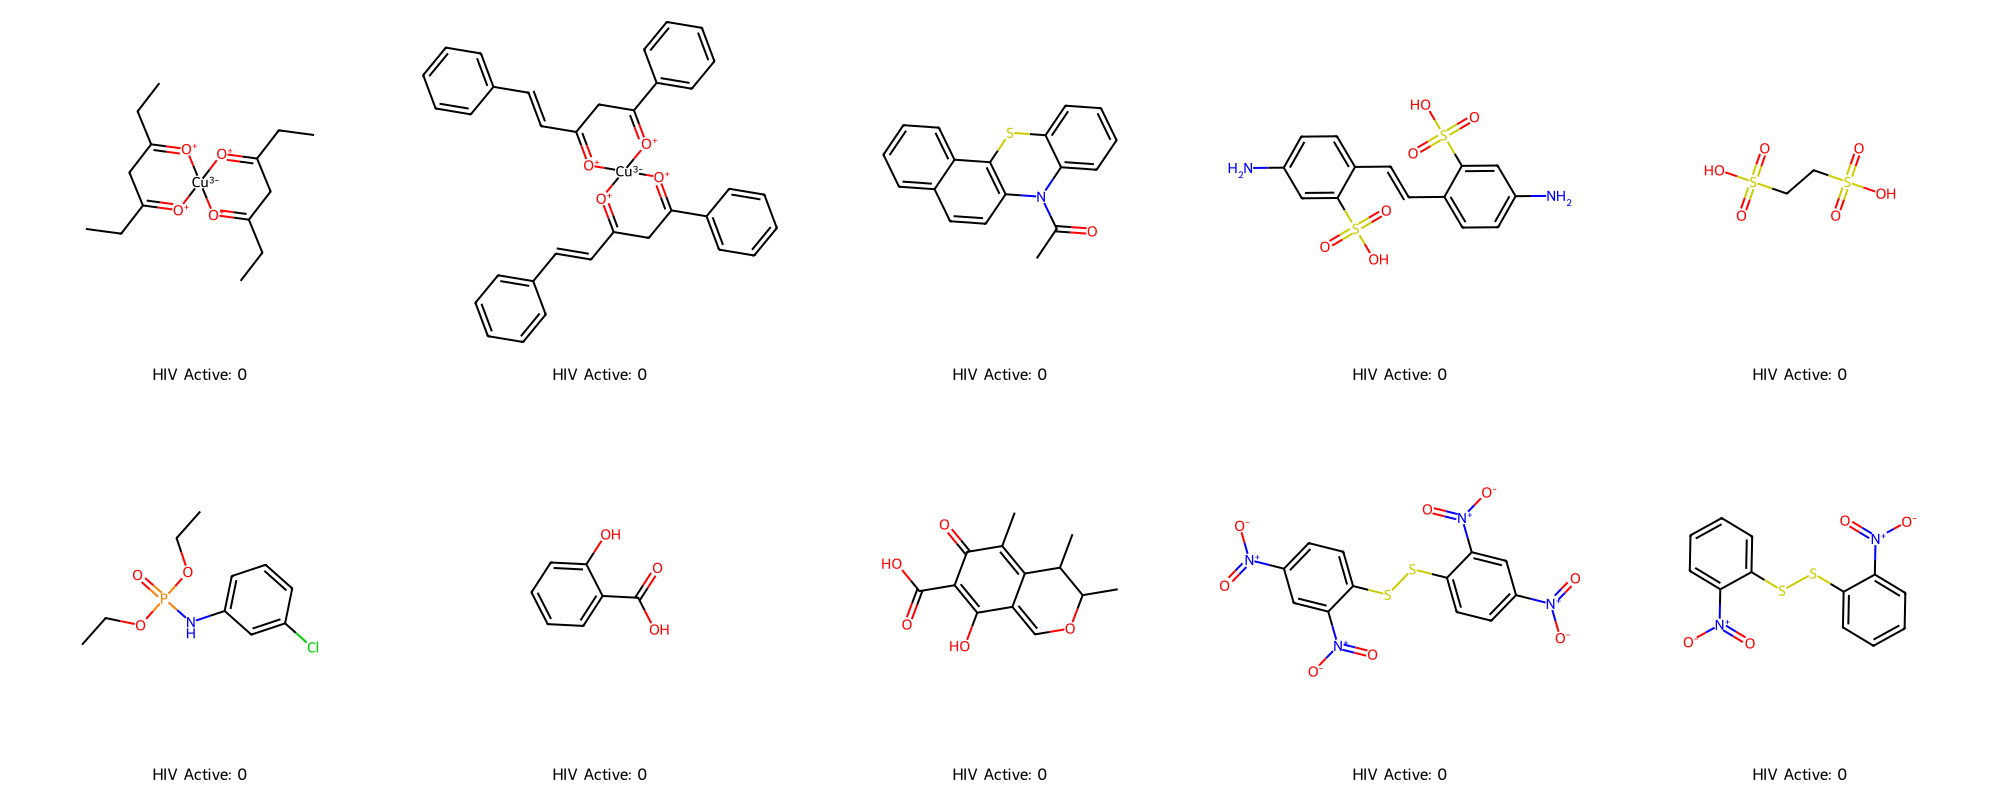

In [6]:
if not os.path.exists("../data/images"):
    os.makedirs("../data/images")

def display_smiles(smiles):
    molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
    Draw.MolsToGridImage(
        molecules[:10],
        molsPerRow=5,
        subImgSize=(400, 400),
        legends=[f"HIV Active: {x}" for x in data["HIV_active"]],
        returnPNG=False,
    ).save("../data/images/molecules.png")
    display("Click on the photo to zoom it")
    display(Image("../data/images/molecules.png"))

display_smiles(data["smiles"])

It would be even better if they are in 3D, wouldn't it? 

In [7]:
def visualize_hiv_molecules(data):
    # Filter one molecule for each HIV_active category
    hiv_active_0 = data[data['HIV_active'] == 0].iloc[0]  # First molecule with HIV_active = 0
    hiv_active_1 = data[data['HIV_active'] == 1].iloc[0]  # First molecule with HIV_active = 1

    # Function to generate 3D visualization
    def visualize_molecule(smiles):
        mol = Chem.MolFromSmiles(smiles)
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        block = Chem.MolToMolBlock(mol)

        # Visualize with py3Dmol
        view = py3Dmol.view(width=400, height=400)
        view.addModel(block, "mol")
        view.setStyle({'stick': {}})
        view.zoomTo()
        return view

    # Visualize the two molecules
    print("HIV Active = 0 Molecule:")
    view_0 = visualize_molecule(hiv_active_0['smiles'])
    view_0.show()

    print("HIV Active = 1 Molecule:")
    view_1 = visualize_molecule(hiv_active_1['smiles'])
    view_1.show()

visualize_hiv_molecules(data)


HIV Active = 0 Molecule:


[00:33:04] UFFTYPER: Unrecognized hybridization for atom: 4
[00:33:04] UFFTYPER: Unrecognized atom type: Cu+1 (4)


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

HIV Active = 1 Molecule:


3Dmol.js failed to load for some reason. Please check your browser console for error messages.